## Finding Heavy Traffic Indicatiors on I-94
We are going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

Dataset:
John Hogue made the dataset available, and it is available [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

Data Dictionary:
`holiday` - Categorical US National holidays plus regional holiday, Minnesota State Fair\ `temp` - Numeric Average temp in kelvin\ `rain_1h` - Numeric Amount in mm of rain that occurred in the hour\ `snow_1h` - Numeric Amount in mm of snow that occurred in the hour\ `clouds_all` - Numeric Percentage of cloud cover\ `weather_main` - Categorical Short textual description of the current weather\ `weather_description` - Categorical Longer textual description of the current weather\ `date_time` - DateTime Hour of the data collected in local CST time\ `traffic_volume` - Numeric Hourly I-94 ATR 301 reported westbound traffic volume.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#When we use Matplotlib inside Jupyter, we also need to add the %matplotlib inline magic 
#— this enables Jupyter to generate the graphs.
%matplotlib inline

### Step 1 - Read the file and first analyzes 
We will start with importing pandas, reading data in dataframe, printing top 5 and bottom 5 records and printing the information about the dataset.



In [9]:
#read the file and print the first and last five rows
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head(5))
print(traffic.tail(5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [10]:
# general info 
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [11]:
# describe
traffic.describe(include = 'all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


#### Observations:
- There are 48204 entries with data in 9 columns with all non-null values
- temp, rain_1h, snow_1h, clouds_all and traffic_volume have data in numeric format.
- date_time will have to be converted to date time format for analysis.
- holiday has 12 unique values
- weather_main has 11 unique values
- weather_description has 38 unique values.

### Step 2 - Analyze the traffic volume with a histogram
We're going to plot a histogram to examine the distribution of the `traffic_volume` column.

After that, we can look up a few statistics about the `traffic_volume`



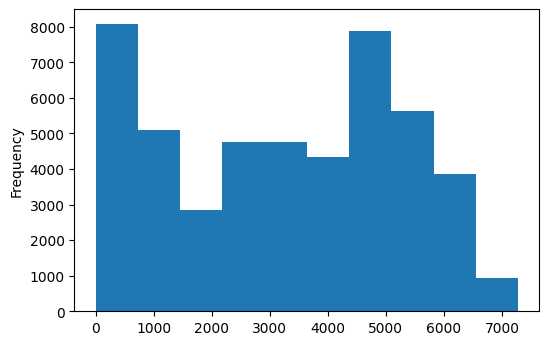

In [12]:
#plot a histogram
traffic['traffic_volume'].plot.hist()
plt.show()

In [13]:
#statistics about the traffic_volume column
print(traffic['traffic_volume'].describe())

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Previously, we analyzed the distribution of traffic_volume and found the following:

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

### Step 3: Comparing daytime with nighttime data
We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [16]:
# transform date_time column to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# day
day = traffic[traffic['date_time'].dt.hour.between(7,19)]

#night
night = traffic[~(traffic['date_time'].dt.hour.between(7,19))]

In [22]:
day


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947


In [18]:
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
15,None,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506
...,...,...,...,...,...,...,...,...,...
48184,None,280.17,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 06:00:00,802
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


`Day Dataframe` has 25838 records and `Night Dataframe` has 22366 records. Both sums to 48204 which is equal to our records in actual dataset.



### Step 4: Traffic volume analyze - Day and Night
Now we're going to compare the traffic volume at night and during day.

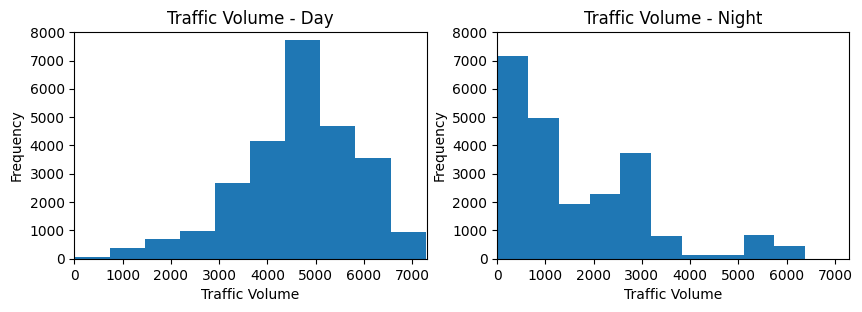

In [23]:
# create a grid chart with 2 columns and 1 row
plt.figure(figsize = (10,3))

#plot a histogram for the daytime
plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.title('Traffic Volume - Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
#define a range for the axis
plt.xlim(0,7300) # 7280 is the max value
plt.ylim(0, 8000)

#plot a hist. for the nightime
plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.title('Traffic Volume - Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
#define a range for the axis
plt.xlim(0,7300) # 7280 is the max value
plt.ylim(0, 8000)

plt.show()

In [26]:
# print the statistics - day
day['traffic_volume'].describe()


count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [28]:
# print the statistics - night
night['traffic_volume'].describe()


count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

#### Observations:
1. Day histogram is left or negatively skewed
2. Night histogram is right or positively skewed.
3. Maximum time the night traffic volume is between 0-500.
4. The mean value of day traffic is 4650 which is almost thrice of night traffic mean value i.e 1655.
5. Since our analysis is to identify the heavy traffic indicators, we can drop the night data from this analysis.

### Step 5: Analyze the data based on time
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

In [30]:
#Use day['date_time'].dt.month to create a new column where each value describes the month when the traffic volume measurement was taken.
day['month'] = day['date_time'].dt.month 
#Use day.groupby('month').mean() to group the dataset by the month column with the mean as an aggregate function.
by_month = day.groupby('month').mean()
by_month['traffic_volume']





<ipython-input-30-b480aa2e6370>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

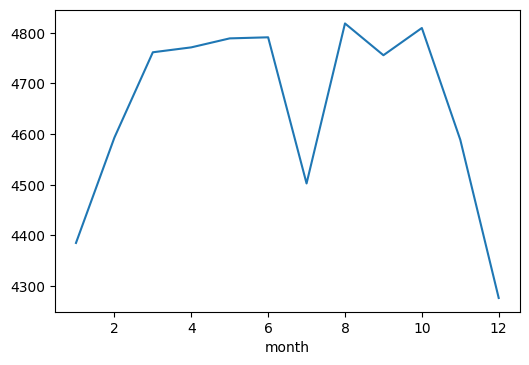

In [31]:
# generate a line plot to visualize how the traffic volume changed each month on average
by_month['traffic_volume'].plot.line()


#### Observations:
1. The traffic volume is less at the start of the year and end of the year. Probably due to Christmas and New Year holidays it is less.
2. Also, the traffic reduces around July, when it is summer holidays.

In [32]:
# Same analogy - but based on day of the week

day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-32-1005c1807bc3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

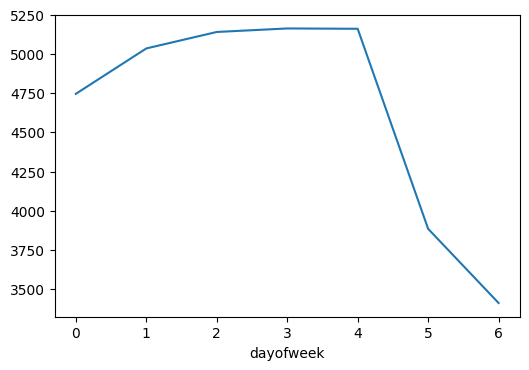

In [33]:
by_dayofweek['traffic_volume'].plot.line()

#### Observations:
1. The traffic remains almost same during the week and drastically reduces over the weekend.
2. We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [34]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-34-4244afafd4b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(0.0, 6500.0)

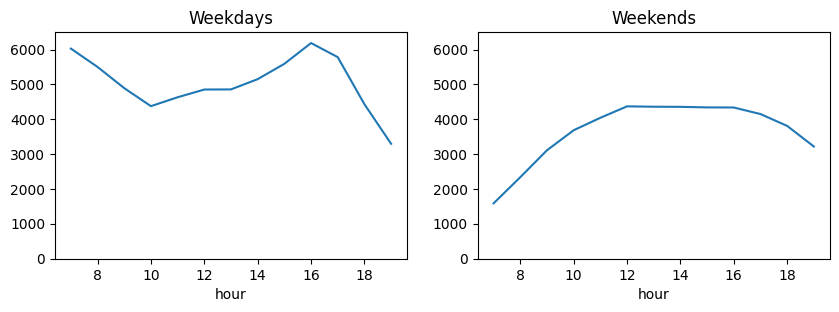

In [35]:
# Plot Grid line charts to analyze the day data based on hour over the weekday and weekends separately.

# Create a grid chart with 2 columns and 1 row

plt.figure(figsize=(10,3))

# Create line graph for Weekday
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Weekdays')
plt.ylim(0,6500)
# Create line graph for Weekends
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekends')
plt.ylim(0,6500)

#### Observations:
1. During weekdays, the traffic is more at the start of the day and then starts reducing until 10 AM. After that it again starts rising until 4 PM. Probably, people are commuting to work during this time and thus the traffic is more.

2. It's opposite during Weekends. At the start of the day, the traffic is very low and then gradually increases until noon and remains constant after that until 4 PM.

### Step 6: Weather Indicators
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

1. Find the correlation values between traffic_volume and numerical weather columns
2. Find weather column with strongest correlation and plot a scatter plot

In [36]:
# Find the correlation values
day.corr()['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
dayofweek        -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

The strongest correlation of `traffic_volume` is with `temp`. So, let's plot the scatter plot between these two columns.

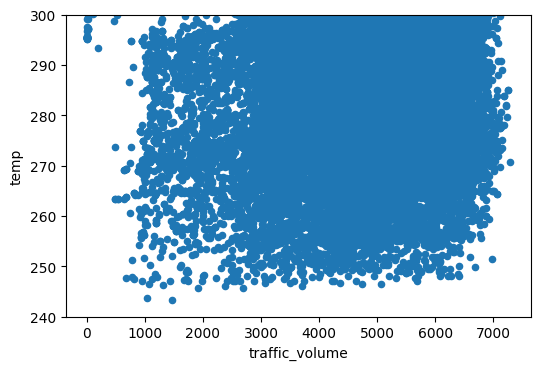

In [38]:
day.plot.scatter('traffic_volume','temp')
plt.ylim(240,300)
plt.show()

#### Observations:
1. There is nothing conclusive that we can find from the above scatter plot and rest all numeric weather parameters are not strongly correlated as temp.

2. To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

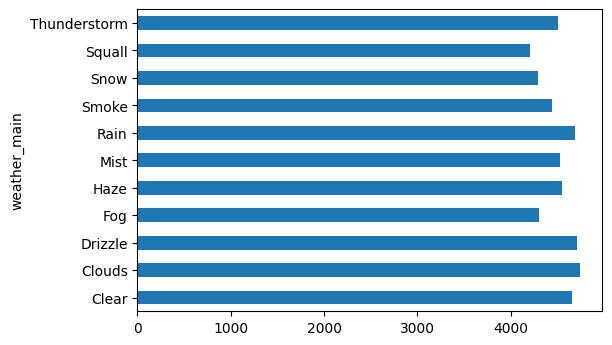

In [42]:
# Calculate the average traffic volume grouped by `weather_main` and `weather_description`
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

# plot a horizontal bar plot for the traffic_volume column of by_weather_main
by_weather_main['traffic_volume'].plot.barh()


#### Observations:
There is nothing conclusive that comes out of the analysis from the above plot. Let's analyze the plot for traffic_column of weather_description.

In [ ]:
# Plot a horizontal bar plot for the traffic_volume column of weather_description
by_weather_description['traffic_volume'].plot.barh(figsize = (10,10))
plt.show()

#### Observations:
As evident from the above plot, in three situations the traffic is higher than 5000:

- shower snow
- light rain and snow
- proximity thunderstorm with drizzle

There are other weather conditions which are worst than the above mentioned but there is not much impact on traffic_volume change due to those weather conditions. We can probably say that during the time when weather is bad but not worst, there is high traffic volume on I-94

### Conclusion:
1. Traffic Volume is high during day time as compared to night time.
2.The traffic volume is less at the start of the year and end of the year. Probably due to Christmas and New Year holidays it is less.
Also, the traffic reduces around July, when it is summer holidays.
The traffic remains almost same during the week and drastically reduces over the weekend.
During weekdays, the traffic is more at the start of the day and then starts reducing until 10 AM. After that it again starts rising until 4 PM. Probably, people are commuting to work during this time and thus the traffic is more.
It's opposite during Weekends. At the start of the day, the traffic is very low and then gradually increases until noon and remains constant after that until 4 PM.
In three situations the traffic is higher than 5000:
shower snow
light rain and snow
proximity thunderstorm with drizzle